# Assignment03
# Name: SonJeongSeol
# StudentID: 20155093

# First, we should import some APIs and Libraries for our projects.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math


# generatePointCluster() function generates 50 points whose distances are differ from 0 to 1, from x_offset and y_offset value each. It also labels each point a random label among 1~3, thus we can generate 3 sets of random points, total 150 points using this function. 

In [26]:
def generatePointCluster(xoff,yoff):
    f=0.
    v=0.
    l=1
    xt=[[xoff,yoff,l] for k in range(50)]
    x=np.array(xt)
    for k in range(50):
        if(l==3):
            x[k,2]=l
            l=1
        else:
            x[k,2]=l
            l+=1    
        f=random.random()
        x[k,0]+=f
        f=random.random()
        x[k,1]+=f
    return x

# And then we should write computeCentroid() function. This function generates 3 centroid points. Each of them has an average magnitude of each set of points with label 1,2, and 3, generated by generatePointCluster() function.

In [21]:
def computeCentroid(p1,p2,p3):
    c1=[0,0]
    c2=[0,0]
    c3=[0,0]
    for k in range(50):
        if(p1[k,2]==1):
            c1[0]+=p1[k,0]
            c1[1]+=p1[k,1]
        if(p2[k,2]==1):
            c1[0]+=p2[k,0]
            c1[1]+=p2[k,1]  
        if(p3[k,2]==1):
            c1[0]+=p3[k,0]
            c1[1]+=p3[k,1]  
            
    for k in range(50):
        if(p1[k,2]==2):
            c2[0]+=p1[k,0]
            c2[1]+=p1[k,1]
        if(p2[k,2]==2):
            c2[0]+=p2[k,0]
            c2[1]+=p2[k,1]  
        if(p3[k,2]==2):
            c2[0]+=p3[k,0]
            c2[1]+=p3[k,1]  
            
    for k in range(50):
        if(p1[k,2]==3):
            c3[0]+=p1[k,0]
            c3[1]+=p1[k,1]
        if(p2[k,2]==3):
            c3[0]+=p2[k,0]
            c3[1]+=p2[k,1]  
        if(p3[k,2]==3):
            c3[0]+=p3[k,0]
            c3[1]+=p3[k,1]  
    
    c1[0]=c1[0]/50
    c1[1]=c1[1]/50
    c2[0]=c2[0]/50
    c2[1]=c2[1]/50
    c3[0]=c3[0]/50     
    c3[1]=c3[1]/50 
    c=[c1,c2,c3]
    return c

# After finishing writing above function, we declare objects for testing, to see if they operates nicely.

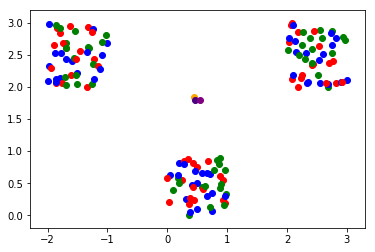

In [29]:
p1= generatePointCluster(0.,0.)
p2= generatePointCluster(2.,2.)
p3= generatePointCluster(-2.,2.)
fig, ax= plt.subplots()
c= computeCentroid(p1,p2,p3)
for k in range(50):
    if(p1[k,2]==1):
        ax.scatter(p1[k,0],p1[k,1],color="red")
    elif(p1[k,2]==2):
        ax.scatter(p1[k,0],p1[k,1],color="blue")
    elif(p1[k,2]==3):
        ax.scatter(p1[k,0],p1[k,1],color="green")
    if(p2[k,2]==1):
        ax.scatter(p2[k,0],p2[k,1],color="red")
    elif(p2[k,2]==2):
        ax.scatter(p2[k,0],p2[k,1],color="blue")
    elif(p2[k,2]==3):
        ax.scatter(p2[k,0],p2[k,1],color="green")
    if(p3[k,2]==1):
        ax.scatter(p3[k,0],p3[k,1],color="red")
    elif(p3[k,2]==2):
        ax.scatter(p3[k,0],p3[k,1],color="blue")
    elif(p3[k,2]==3):
        ax.scatter(p3[k,0],p3[k,1],color="green")
ax.scatter(c[0][0],c[0][1],color="orange")
ax.scatter(c[1][0],c[1][1],color="indigo")
ax.scatter(c[2][0],c[2][1],color="purple") 

# After that, we generate some functions which will be applied to the k-means algorithm. computeDistance() computes the distance between every points and each centroid, and then re-labels them. The label matches the centroid which they are closest from themselves. 

In [71]:
def computeDistance(d1,d2,d3,d1_x,d1_y,d2_x,d2_y,d3_x,d3_y,p1,p2,p3,c):
   
    for k in range(50):
        d1_x=c[0][0]-p1[k][0]
        d1_y=c[0][1]-p1[k][1]
        d1=math.sqrt((d1_x)**2 +(d1_y)**2)
        d2_x=c[1][0]-p1[k][0]
        d2_y=c[1][1]-p1[k][1]
        d2=math.sqrt((d2_x)**2 +(d2_y)**2)
        d3_x=c[2][0]-p1[k][0]
        d3_y=c[2][1]-p1[k][1]
        d3=math.sqrt((d3_x)**2 +(d3_y)**2)
        
        if(d1<=d2):    
            if(d1<=d3):
                p1[k][2]=1
            else:
                p1[k][2]=3
        else:
            if(d2<=d3):
                p1[k][2]=2
            else:
                p1[k][2]=3
       
            
    for k in range(50):
        d1_x=c[0][0]-p2[k][0]
        d1_y=c[0][1]-p2[k][1]
        d1=math.sqrt((d1_x)**2 +(d1_y)**2)
        d2_x=c[1][0]-p2[k][0]
        d2_y=c[1][1]-p2[k][1]
        d2=math.sqrt((d2_x)**2 +(d2_y)**2)
        d3_x=c[2][0]-p2[k][0]
        d3_y=c[2][1]-p2[k][1]
        d3=math.sqrt((d3_x)**2 +(d3_y)**2)
        
        if(d1<=d2):    
            if(d1<=d3):
                p2[k][2]=1
            else:
                p2[k][2]=3
        else:
            if(d2<=d3):
                p2[k][2]=2
            else:
                p2[k][2]=3
        
            
    for k in range(50):
        d1_x=c[0][0]-p3[k][0]
        d1_y=c[0][1]-p3[k][1]
        d1=math.sqrt((d1_x)**2 +(d1_y)**2)
       
        d2_x=c[1][0]-p3[k][0]
        d2_y=c[1][1]-p3[k][1]
        d2=math.sqrt((d2_x)**2 +(d2_y)**2)
        
        d3_x=c[2][0]-p3[k][0]
        d3_y=c[2][1]-p3[k][1]
        d3=math.sqrt((d3_x)**2 +(d3_y)**2)
        
        if(d1<=d2):    
            if(d1<=d3):
                p3[k][2]=1
            else:
                p3[k][2]=3
        else:
            if(d2<=d3):
                p3[k][2]=2
            else:
                p3[k][2]=3
        
    return p1,p2,p3

# computeEnergy() computes the total Energy of each iteration. 

In [73]:
def computeEnergy(c_t,c):
    c_t[0][0]=c_t[0][0]-c[0][0]
    c_t[0][1]=c_t[0][1]-c[0][1]
    c_t[1][0]=c_t[1][0]-c[1][0]
    c_t[1][1]=c_t[1][1]-c[1][1]
    c_t[2][0]=c_t[2][0]-c[2][0]
    c_t[2][1]=c_t[2][1]-c[2][1]
    d1= (c_t[0][0])**2 + (c_t[0][1])**2
    d2= (c_t[1][0])**2 + (c_t[1][1])**2
    d3= (c_t[2][0])**2 + (c_t[2][1])**2
    d= d1+d2+d3
    return d

# Since we've finished writing all the functions we need, we set k to 6 and iterates the algorithm until all points are saturated.

Energy for  iteration #1 : 14.338228
c1=1.069552 4.942075, c2=0.000000 0.000000, c3= 0.352540 0.570293
_____________________________________________________
Energy for  iteration #2 : 20.823173
c1=1.603424 1.752862, c2=0.014620 0.016559, c3= -0.195952 3.742947
_____________________________________________________
Energy for  iteration #3 : 5.155352
c1=2.498352 2.570542, c2=0.443731 0.448653, c3= -1.519990 2.493173
_____________________________________________________
Energy for  iteration #4 : 0.000000
c1=2.498352 2.570542, c2=0.443731 0.448653, c3= -1.519990 2.493173
_____________________________________________________
Energy for  iteration #5 : 0.000000
c1=2.498352 2.570542, c2=0.443731 0.448653, c3= -1.519990 2.493173
_____________________________________________________
Energy for  iteration #6 : 0.000000
c1=2.498352 2.570542, c2=0.443731 0.448653, c3= -1.519990 2.493173
_____________________________________________________


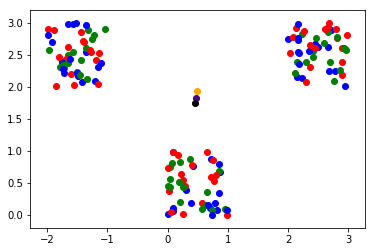

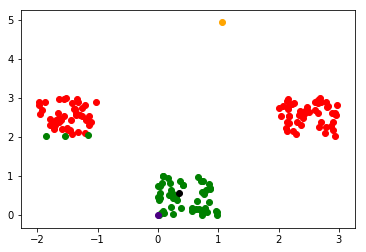

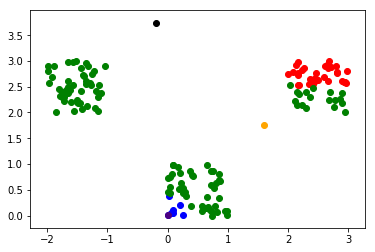

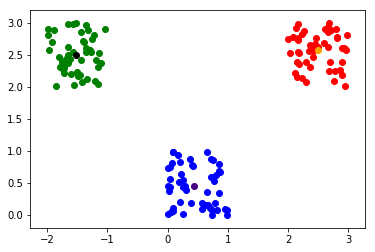

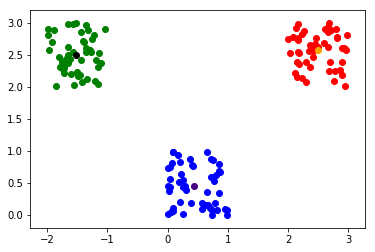

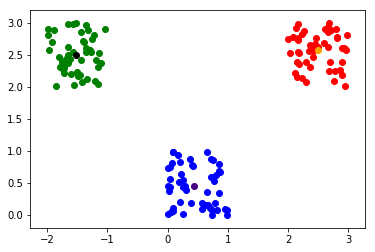

In [70]:
p1= generatePointCluster(0.,0.)
p2= generatePointCluster(2.,2.)
p3= generatePointCluster(-2.,2.)
p1_t=p1
p2_t=p2
p3_t=p3
c=computeCentroid(p1_t,p2_t,p3_t)
c_t=c
for x in range(6):    
    fig, ax2= plt.subplots()
    for k in range(50):
        if(p1[k,2]==1):
            ax2.scatter(p1[k,0],p1[k,1],color="red")
        elif(p1[k,2]==2):
            ax2.scatter(p1[k,0],p1[k,1],color="blue")
        elif(p1[k,2]==3):
            ax2.scatter(p1[k,0],p1[k,1],color="green")
        if(p2[k,2]==1):
            ax2.scatter(p2[k,0],p2[k,1],color="red")
        elif(p2[k,2]==2):
            ax2.scatter(p2[k,0],p2[k,1],color="blue")
        elif(p2[k,2]==3):
            ax2.scatter(p2[k,0],p2[k,1],color="green")
        if(p3[k,2]==1):
            ax2.scatter(p3[k,0],p3[k,1],color="red")
        elif(p3[k,2]==2):
            ax2.scatter(p3[k,0],p3[k,1],color="blue")
        elif(p3[k,2]==3):
            ax2.scatter(p3[k,0],p3[k,1],color="green")
    ax2.scatter(c[0][0],c[0][1],color="orange")
    ax2.scatter(c[1][0],c[1][1],color="indigo")
    ax2.scatter(c[2][0],c[2][1],color="black") 
    p1_t,p2_t,p3_t= computeDistance(0,0,0,0,0,0,0,0,0,p1_t,p2_t,p3_t,c)
    c_t=c
    c=computeCentroid(p1_t,p2_t,p3_t)
    d= computeEnergy(c_t,c)
    print("Energy for  iteration #%d : %f"%(x+1,d))
    print("c1=%f %f, c2=%f %f, c3= %f %f"%(c[0][0],c[0][1],c[1][0],c[1][1],c[2][0],c[2][1]))
    print("_____________________________________________________")

# github link: https://github.com/wjdtjf1234/assignment01.git